In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import simpsom as sps
from sklearn import metrics #for evaluation

In [8]:
Iris = pd.read_csv('data/Iris.csv')
print(Iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [17]:
X = Iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = Iris['Species']

scaler = StandardScaler()
scaler= scaler.fit(X.values)

X_scale = scaler.transform(X.values)

In [10]:
X.shape

(150, 4)

### SOM

In [22]:
net = sps.SOMNet(10, 10, X_scale, PBC=True) 
net.train()

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


In [23]:
cls = net.cluster(X_scale, clus_type='KMeans') #'MeanShift') #
cls

[[55,
  61,
  63,
  64,
  66,
  71,
  73,
  74,
  78,
  84,
  88,
  91,
  95,
  96,
  97,
  99,
  127,
  138,
  149],
 [0, 4, 6, 7, 11, 17, 20, 22, 23, 24, 26, 27, 28, 31, 39, 40, 43, 49],
 [50,
  52,
  58,
  65,
  75,
  76,
  77,
  86,
  102,
  105,
  107,
  109,
  117,
  118,
  122,
  125,
  129,
  130,
  131,
  135,
  139],
 [54,
  68,
  72,
  83,
  87,
  101,
  103,
  108,
  111,
  113,
  114,
  119,
  121,
  123,
  126,
  128,
  132,
  133,
  134,
  142,
  146],
 [51,
  56,
  70,
  85,
  100,
  104,
  110,
  112,
  115,
  116,
  120,
  124,
  136,
  137,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [1, 2, 3, 8, 9, 12, 13, 25, 29, 30, 34, 35, 37, 38, 41, 42, 45, 47],
 [53, 57, 59, 60, 62, 67, 69, 79, 80, 81, 82, 89, 90, 92, 93, 94, 98, 106],
 [5, 10, 14, 15, 16, 18, 19, 21, 32, 33, 36, 44, 46, 48]]

<Figure size 432x288 with 0 Axes>

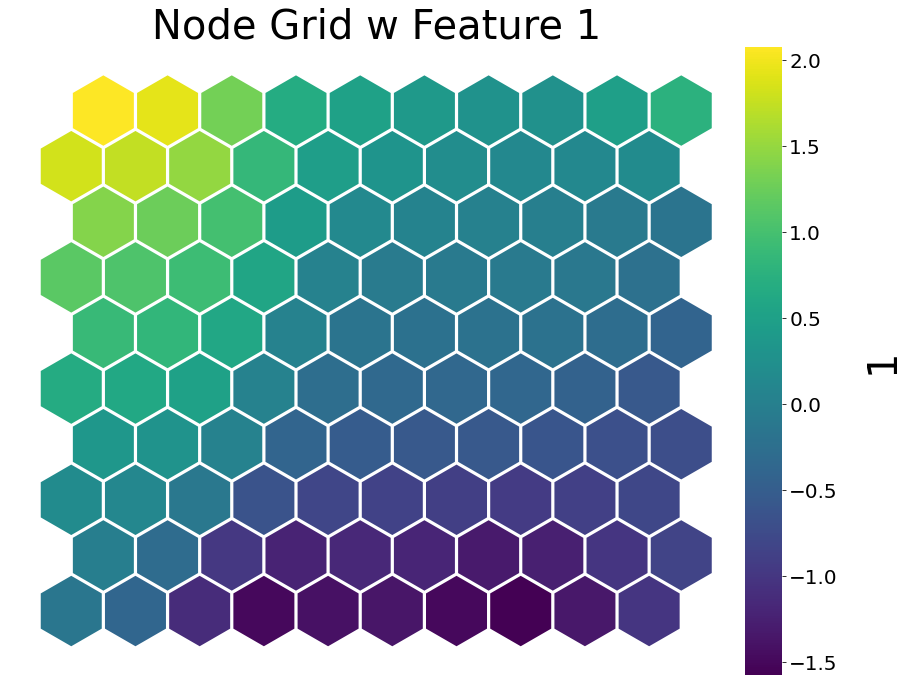

In [24]:
net.nodes_graph(colnum=1)

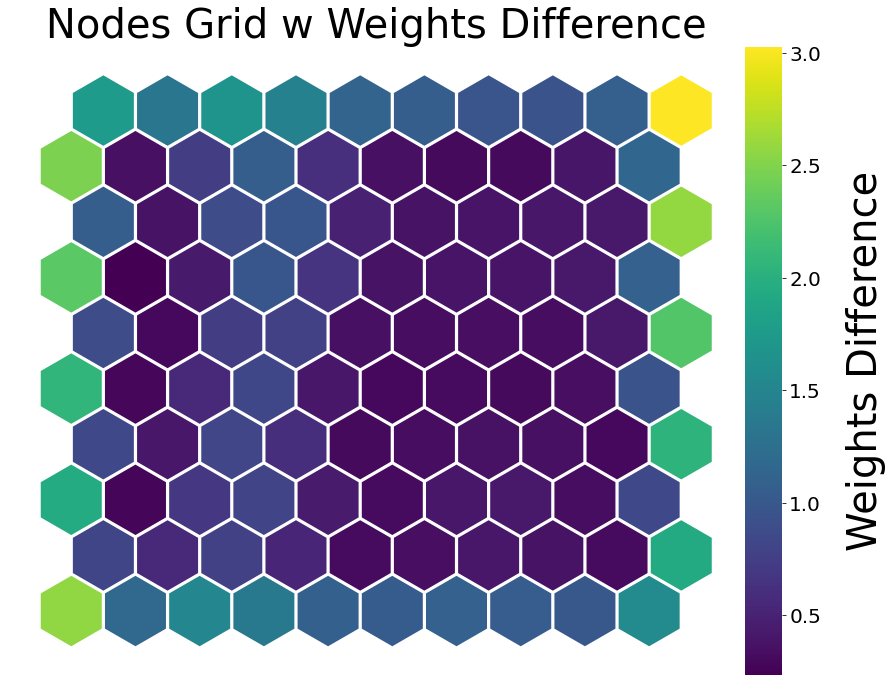

In [25]:
net.diff_graph()

In [26]:
cls_id = np.zeros([len(X_scale)])

In [27]:
for i in range(len(cls)):
    cls_id[cls[i]] = i

cls_id

array([1., 5., 5., 5., 1., 7., 1., 1., 5., 5., 7., 1., 5., 5., 7., 7., 7.,
       1., 7., 7., 1., 7., 1., 1., 1., 5., 1., 1., 1., 5., 5., 1., 7., 7.,
       5., 5., 7., 5., 5., 1., 1., 5., 5., 1., 7., 5., 7., 5., 7., 1., 2.,
       4., 2., 6., 3., 0., 4., 6., 2., 6., 6., 0., 6., 0., 0., 2., 0., 6.,
       3., 6., 4., 0., 3., 0., 0., 2., 2., 2., 0., 6., 6., 6., 6., 3., 0.,
       4., 2., 3., 0., 6., 6., 0., 6., 6., 6., 0., 0., 0., 6., 0., 4., 3.,
       2., 3., 4., 2., 6., 2., 3., 2., 4., 3., 4., 3., 3., 4., 4., 2., 2.,
       3., 4., 3., 2., 3., 4., 2., 3., 0., 3., 2., 2., 2., 3., 3., 3., 2.,
       4., 4., 0., 2., 4., 4., 3., 4., 4., 4., 3., 4., 4., 0.])

In [28]:
cls_id.shape

(150,)

## Rand Index/Score

In [29]:
rand_score = metrics.rand_score(y, cls_id)
print('Rand Score >> ', rand_score)

Rand Score >>  0.7353020134228188


In [31]:
cls_id

array([1., 5., 5., 5., 1., 7., 1., 1., 5., 5., 7., 1., 5., 5., 7., 7., 7.,
       1., 7., 7., 1., 7., 1., 1., 1., 5., 1., 1., 1., 5., 5., 1., 7., 7.,
       5., 5., 7., 5., 5., 1., 1., 5., 5., 1., 7., 5., 7., 5., 7., 1., 2.,
       4., 2., 6., 3., 0., 4., 6., 2., 6., 6., 0., 6., 0., 0., 2., 0., 6.,
       3., 6., 4., 0., 3., 0., 0., 2., 2., 2., 0., 6., 6., 6., 6., 3., 0.,
       4., 2., 3., 0., 6., 6., 0., 6., 6., 6., 0., 0., 0., 6., 0., 4., 3.,
       2., 3., 4., 2., 6., 2., 3., 2., 4., 3., 4., 3., 3., 4., 4., 2., 2.,
       3., 4., 3., 2., 3., 4., 2., 3., 0., 3., 2., 2., 2., 3., 3., 3., 2.,
       4., 4., 0., 2., 4., 4., 3., 4., 4., 4., 3., 4., 4., 0.])

In [30]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Enropy

In [46]:
contingency_matrix = metrics.cluster.contingency_matrix(y, cls_id)

In [48]:
#print(contingency_matrix)

#in class 
contingency_matrix = np.array([[0,18,0,0,0,18,0,14],
                               [8,0,17,1,5,0,16,3],
                               [13,0,1,17,16,0,3,0] 
                              ])
print(contingency_matrix)

[[ 0 18  0  0  0 18  0 14]
 [ 8  0 17  1  5  0 16  3]
 [13  0  1 17 16  0  3  0]]


In [51]:

mij = contingency_matrix
mi = contingency_matrix.sum(axis=0)
pij = mij/mi

log2pij = np.log2(pij,out=np.zeros_like(pij), where=(pij!=0))
print(pij.round(2))
print(log2pij.round(2))

ei = pij*log2pij
ei = -1*ei.sum(axis=0)
print('e_i \n', ei.round(2))

m = contingency_matrix.sum()

entropy = ((mi/m)*ei).sum()
print('entropy =', entropy )


[[0.   1.   0.   0.   0.   1.   0.   0.82]
 [0.38 0.   0.94 0.06 0.24 0.   0.84 0.18]
 [0.62 0.   0.06 0.94 0.76 0.   0.16 0.  ]]
[[ 0.    0.    0.    0.    0.    0.    0.   -0.28]
 [-1.39  0.   -0.08 -4.17 -2.07  0.   -0.25 -2.5 ]
 [-0.69  0.   -4.17 -0.08 -0.39  0.   -2.66  0.  ]]
e_i 
 [ 0.96 -0.    0.31  0.31  0.79 -0.    0.63  0.67]
entropy = 0.4752685702626609


### Purity

In [34]:
#purity
np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

0.86

In [33]:
np.amax(contingency_matrix, axis=0)

array([16, 21, 17, 17, 16, 18, 11, 13], dtype=int64)

### Kmeans

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import simpsom as sps
from sklearn import metrics #for evaluation
from sklearn.metrics.cluster import rand_score


In [35]:
df = pd.read_csv('data/Iris.csv')
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [36]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Species']]

In [52]:

model = KMeans(n_clusters=3, random_state=0)

model.fit(X)


KMeans(n_clusters=3, random_state=0)

In [53]:
cls_id = model.labels_

### Evaluate by Rand Index/Score

In [54]:
#แบบที่ 1
rand = metrics.cluster.rand_score(y['Species'],cls_id)
print(rand)

0.8797315436241611


In [43]:
#แบบที่ 2  
#ในคลาสมีการตั้งชื่อ rand_score ซ้ำกับชื่อ ฟังก์ชัน เมื่อรันแล้วจะทำให้ overide ฟังก์ชันที่ import มาก่อนหน้า
#เวลากดรันในครั้งถัดไป จึงมอง rand_score ไม่ใช่ฟังก์ชัน  เมื่อ import ใหม่อีกที เพื่อเรียก ฟังก์ชัน rand_score มาทำงาน 
#วิธีที่ดีสุด คือ ไม่ควรตั้งชื่อ ตัวแปร ให้เหมือนฟังก์ชัน 
#from sklearn.metrics.cluster import rand_score

rand = rand_score(y['Species'],cls_id)  #ไม่ควรตั้งชื่อ ตัวแปร ซ้ำกับชื่อฟังก์ชัน 
print(rand)

0.7353020134228188


### Hirarchical Clustering

In [27]:
cls_id.shape

(150,)

In [41]:
metrics.cluster.rand_score(y['Species'].values,cls_id)

0.7353020134228188